# Titanic Data Analysis

## Overview

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On her maiden voyage, she carried thousands of passengers and crew, and the tragedy that befell her has since been a tale of both human error and heroism. This project aims to delve into the microcosm of society aboard the Titanic before its untimely demise. We will employ data analysis and machine learning techniques to uncover patterns and stories that lie within the data—focusing on the demographics of the passengers, the survival rates, and the factors that might have influenced the chances of survival.

### Objectives:
The primary objectives of this analysis are to:

    Understand the composition of passengers aboard the Titanic, including their age, sex, socio-economic status, and other relevant demographics.
    Explore the factors that contributed to the survival of certain passengers while others did not survive.
    Build a predictive model using machine learning to estimate a passenger's likelihood of survival based on their characteristics.

### Methodology:

We will first perform an exploratory data analysis (EDA) to visualize and understand the underlying distribution and relationships within the data. This step includes cleaning the data, handling missing values, and creating informative visualizations. Following EDA, we will apply the Random Forest Classifier, a machine learning algorithm, to predict survival outcomes. We will also tune this model to improve its predictive accuracy.

### Significance:

This project not only serves as a historical analysis but also as a methodological showcase of the power of data science. By interpreting the data through visual and statistical lenses, we can gain insights into the social dynamics of the early 20th century and the human factors in maritime disasters. Additionally, the project will demonstrate the application of data preprocessing, EDA, and machine learning in a real-world context, reflecting the practical skills expected of a junior data analyst.

## Initialization

In [48]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set Style
%matplotlib inline
sns.set_style('darkgrid')


# Import Data and Create Data Frame
df = sns.load_dataset('titanic')

# View Head of Data Frame
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# View data types of each column and returns counts of columns with data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [49]:
# Drop the 'deck' column due to a lack of information
df = df.drop(['deck'], axis=1)

In [50]:
# Fill missing age values with the median age
df['age'] = df['age'].fillna(df['age'].median())

In [51]:
# Remove all other null values and reset the index
df = df.dropna().reset_index(drop=True)

In [52]:
# Display the dataset that is now ready for initial analysis
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
885,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
886,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
887,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


# Exploratory Data Analysis

In [7]:
# Calculate and return the average age of a survivor
avg_age_of_survivor = df[df['survived'] == 1]['age'].mean().round()

print(f"The average age of a survivor of the Titanic sinking is: {avg_age_of_survivor}")

# Calculate and return the average age of a fatality
avg_age_of_fatality = df[df['survived'] == 0]['age'].mean().round()

print(f"The average age of a fatality of the Titanic sinking is: {avg_age_of_fatality}")

# Calculate the proportion of survivors of the total counts of our dataset
percentage_survival = df['survived'].sum() / 889
print(f"The percentage of survival during the sinking of the Titanic is: {percentage_survival.round(2) * 100}%")

The average age of a survivor of the Titanic sinking is: 28.0
The average age of a fatality of the Titanic sinking is: 30.0
The percentage of survival during the sinking of the Titanic is: 38.0%


In [8]:
# Calculate and return the age of the oldest survivor of the Titanic
oldest_survivor = df[df['survived'] == 1]['age'].max()

print(f"The age of the oldest survivor of the Titanic sinking is: {oldest_survivor}")

# Calculate and return the age of the youngest fatality
youngest_fatality = df[df['survived'] == 0]['age'].min()

print(f"The age of the youngest fatality of the Titanic sinking is: {youngest_fatality}")

The age of the oldest survivor of the Titanic sinking is: 80.0
The age of the youngest fatality of the Titanic sinking is: 1.0


## Survival Patterns Across Gender and Age Groups

In [53]:
# Edit labels in columns for better clarity
df['who'] = df['who'].map({'man': 'Men', 'woman': 'Women', 'child': 'Children'})

In [54]:
# Returns the counts of the number of men, women, and children on board the Titanic
passengers = df.value_counts(df['who'])
print(passengers)

# Returns the counts of those who survived
survivors = df[df['survived'] == 1]['who'].value_counts()
print(f"\n{survivors}")

# Returns the ratio of survival
survival_ratio = (survivors / passengers).round(2) * 100
print(f"\n{survival_ratio}")

who
Men         537
Women       269
Children     83
Name: count, dtype: int64

who
Women       203
Men          88
Children     49
Name: count, dtype: int64

who
Children    59.0
Men         16.0
Women       75.0
Name: count, dtype: float64


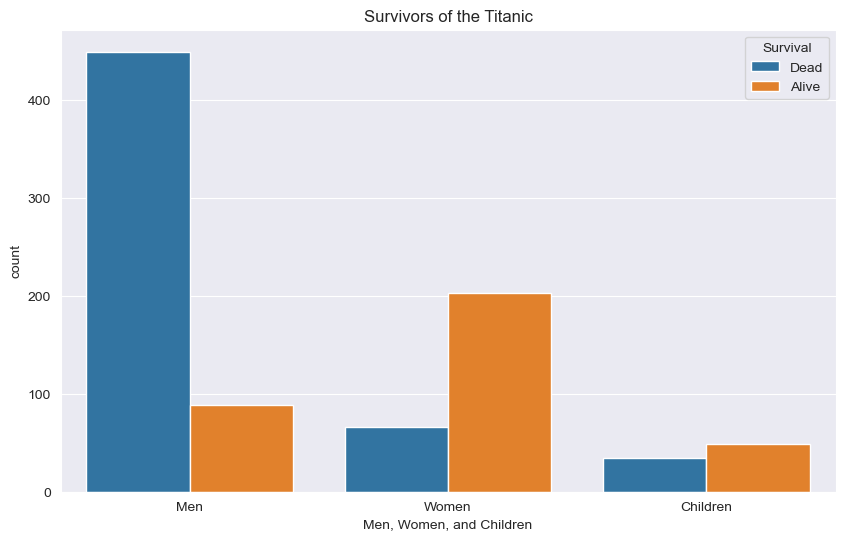

In [55]:
# Chart displaying the count of men, women, and children aboard the Titanic who survived and died

# Create the plot
plt.figure(figsize=(10, 6))

# Create a bar chart - Sex Vs. Heart Disease
sns.countplot(x='who', data=df, hue='alive');

# Customize the plot
plt.title('Survivors of the Titanic')
plt.xlabel('Men, Women, and Children')
plt.legend(title='Survival', labels=['Dead', 'Alive'])

# Display the plot
plt.show()

The bar chart titled "Survivors of the Titanic" depicts the count of men, women, and children who were on the Titanic. From the visualization, it is evident that:

    A significant number of men on the Titanic did not survive, as indicated by the tall blue bar representing deceased males. This suggests that men had a lower survival rate compared to women and children, which may reflect the "women and children first" policy that was reportedly followed during the lifeboat evacuations.

    Women had a higher survival rate, as shown by the orange bar, which is relatively high in comparison to their blue bar. This again could be attributed to the prioritization of women for evacuation to the lifeboats.

    Children also had a relatively high survival rate, as indicated by the balanced height of the orange bar against the blue. This could suggest that children were given priority for lifeboat places alongside women.

The data supports historical accounts that women and children were given priority during the evacuation, leading to higher survival rates for these groups. Additionally, the graph could indicate social norms and maritime disaster protocols of the era, which often prioritized the safety of women and children.

This analysis could be further enriched by examining the survival rates across different passenger classes, as class played a significant role in the survival of passengers on the Titanic. Furthermore, factors such as the location of cabins relative to lifeboats and the actions of the crew during the evacuation could provide more context to these findings.

## Survival Rate by Class

In [12]:
# Returns the counts of the passengers aboard each class of the Titanic
passenger_class = df.value_counts(df['class'])
print(passenger_class)


# Returns the counts of those who survived in each class
survivors = df[df['survived'] == 1]['class'].value_counts()
print(f"\n{survivors}")

# Returns the ratio of survival
survival_ratio = (survivors / passenger_class).round(2) * 100
print(f"\n{survival_ratio}")

class
Third     491
First     214
Second    184
Name: count, dtype: int64

class
First     134
Third     119
Second     87
Name: count, dtype: int64

class
First     63.0
Second    47.0
Third     24.0
Name: count, dtype: float64


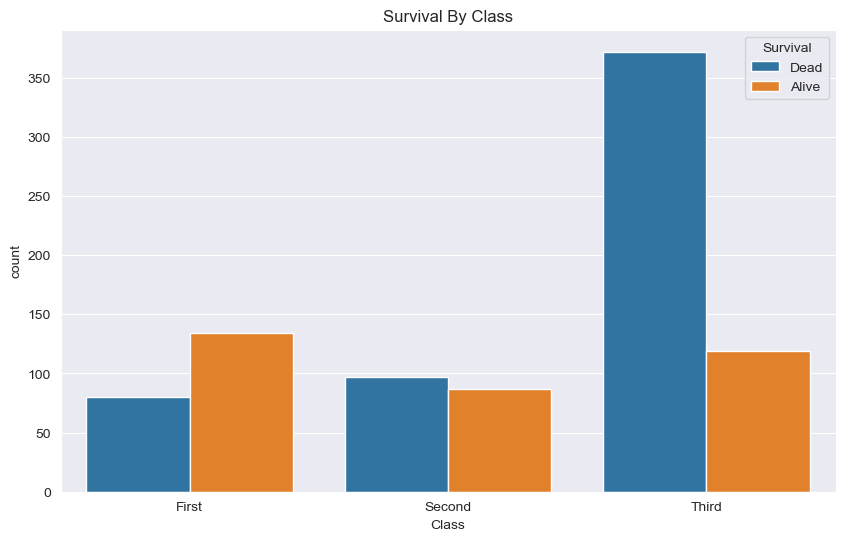

In [13]:
# Chart displaying the survivors by class

# Create the plot
plt.figure(figsize=(10, 6))

# Create a bar chart
sns.countplot(x='class', data=df, hue='alive');

# Customize the plot
plt.title('Survival By Class')
plt.xlabel('Class')
plt.legend(title='Survival', labels=['Dead', 'Alive'])

# Display the plot
plt.show()

The chart titled "Survival By Class" shows the survival status of passengers on the Titanic, segmented by the class of travel (First, Second, and Third Class). The blue bars represent the number of passengers who did not survive, while the orange bars represent those who did survive within each class.

From the chart, we can interpret that:

    The highest number of casualties occurred within the Third Class, which could suggest that Third Class passengers had less access to lifeboats or were less prioritized for evacuation compared to those in higher classes.
    First Class passengers had a higher survival rate, as indicated by the taller orange bar in comparison to the blue bar in the First Class category. This could imply that First Class passengers had better access to lifeboats, possibly due to their cabins being located on higher decks closer to the lifeboats or due to social hierarchies being observed during the evacuation process.
    Second Class passengers had a lower survival rate than First Class but a higher survival rate than Third Class. The number of survivors and casualties in the Second Class is more balanced compared to the other classes.

This chart provides insights into the social stratification of the time and how it may have influenced survival chances during the disaster. It suggests that socioeconomic status played a significant role in survival outcomes, a finding that aligns with historical accounts and analyses of the Titanic tragedy. To provide a more comprehensive understanding, further analysis could include the examination of other factors such as age, sex, and crew versus passenger status in conjunction with class.

## Survival Rate by Boarding Location

In [14]:
# Returns the counts of the passengers who boarded the Titanic at the three locations for boarding
passenger_origin = df.value_counts(df['embark_town'])
print(passenger_origin)

# Returns the counts of those who survived departing from each port
survivors = df[df['survived'] == 1]['embark_town'].value_counts()
print(f"\n{survivors}")

# Returns the ratio of survival
survival_ratio = (survivors / passenger_origin).round(2) * 100
print(f"\n{survival_ratio}")

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

embark_town
Southampton    217
Cherbourg       93
Queenstown      30
Name: count, dtype: int64

embark_town
Southampton    34.0
Cherbourg      55.0
Queenstown     39.0
Name: count, dtype: float64


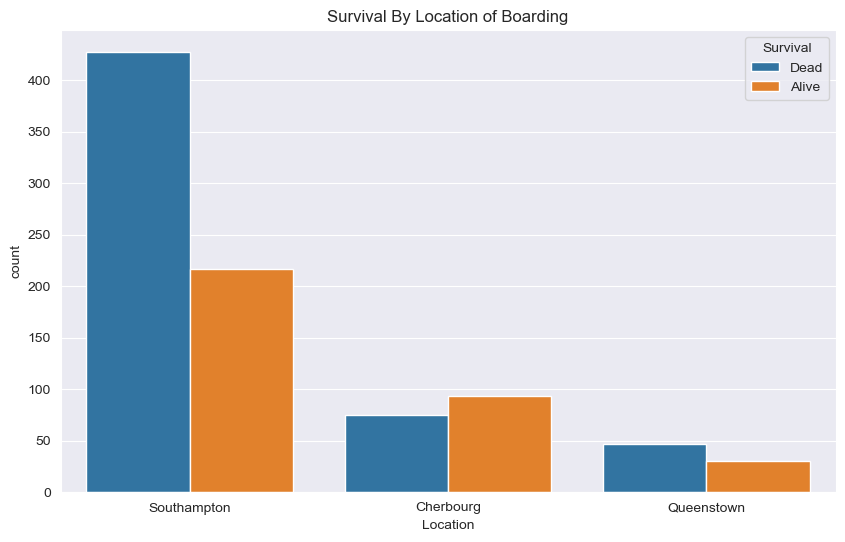

In [15]:
# Chart displaying the survivors by where the passengers embarked from

# Create the plot
plt.figure(figsize=(10, 6))

# Create a bar chart
sns.countplot(x='embark_town', data=df, hue='alive');

# Customize the plot
plt.title('Survival By Location of Boarding')
plt.xlabel('Location')
plt.legend(title='Survival', labels=['Dead', 'Alive'])

# Display the plot
plt.show()

## Determining Statistical Significance of Cherbourg Survival Rate Via Hypothesis Testing

Null Hypothesis (H0): There is no difference in survival rates for passengers embarking from different locations; any observed difference is due to chance.
    
Alternative Hypothesis (H1): There is a significant difference in survival rates for passengers embarking from different locations.

| Embark Town | Survived | Did Not Survive | Total |
|-------------|----------|-----------------|-------|
| Southampton | 217      | 427             | 644   |
| Cherbourg   | 93       | 75              | 168   |
| Queenstown  | 30       | 40              | 77    |
| **Total**   | **288**  | **432**         | **720** |


In [16]:
# Calculating Expected Counts

# Observed counts from the table
observed = np.array([
    [217, 427],
    [93, 75],
    [30, 40]
])

# Totals for each embarkation point and outcomes
totals = {
    'embark_town_total': np.sum(observed, axis=1),
    'outcome_total': np.sum(observed, axis=0),
    'grand_total': np.sum(observed)
}

# Calculate expected counts for each cell in the contingency table
expected = np.outer(totals['embark_town_total'], totals['outcome_total']) / totals['grand_total']

expected

array([[248.25396825, 395.74603175],
       [ 64.76190476, 103.23809524],
       [ 26.98412698,  43.01587302]])

In [17]:
# Calculating the Chi-squared statistic
chi_squared_statistic = np.sum((observed - expected) ** 2 / expected)
chi_squared_statistic

26.987948514075935

In [18]:
from scipy.stats import chi2

# Degrees of freedom: (Number of rows - 1) * (Number of columns - 1)
deg_free = (observed.shape[0] - 1) * (observed.shape[1] - 1)

# Calculating the p-value from the chi-squared statistic
p_value = chi2.sf(chi_squared_statistic, deg_free)
p_value

1.3792450729911294e-06

The p-value calculated from the chi-squared statistic is approximately 1.38×10^-6, which is much lower than the common significance level of 0.05. This leads us to reject the null hypothesis.

This indicates that there is a statistically significant difference in survival rates for passengers embarking from different locations, specifically, that the survival rate for passengers who embarked at Cherbourg is significantly different from those who embarked at Southampton and Queenstown.

## Survival With Others vs. Alone

In [19]:
df['alone'].value_counts()

alone
True     535
False    354
Name: count, dtype: int64

In [20]:
# Returns the counts of the passengers who boarded alone versus with others
lone_passenger = df.value_counts(df['alone'])
lone_passenger

# Returns the counts of those who survived departing from each port
survivors = df[df['survived'] == 1]['alone'].value_counts()
print(f"\n{survivors}")

# Returns the ratio of survival
survival_ratio = (survivors / lone_passenger).round(2) * 100
print(f"\n{survival_ratio}")


alone
False    179
True     161
Name: count, dtype: int64

alone
False    51.0
True     30.0
Name: count, dtype: float64


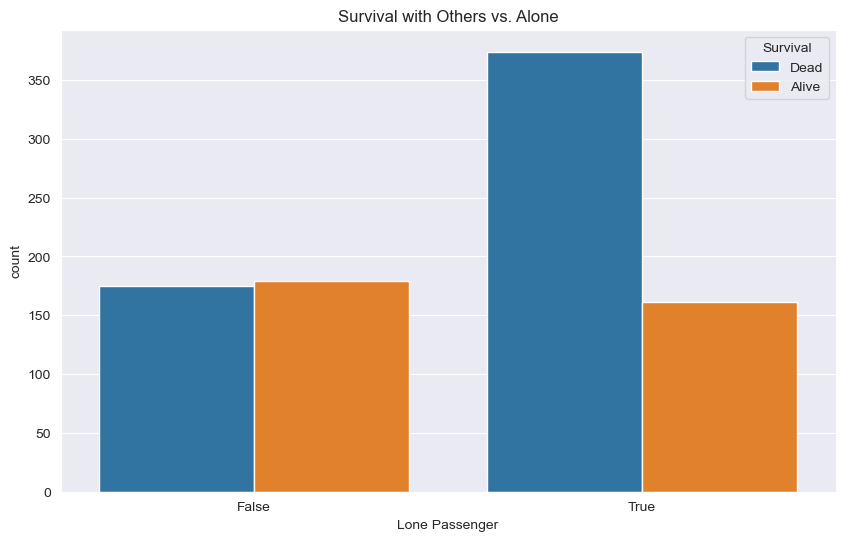

In [21]:
# Chart displaying the count of men, women, and children aboard the Titanic who survived and died

# Create the plot
plt.figure(figsize=(10, 6))

# Create a bar chart - Sex Vs. Heart Disease
sns.countplot(x='alone', data=df, hue='alive');

# Customize the plot
plt.title('Survival with Others vs. Alone')
plt.xlabel('Lone Passenger')
plt.legend(title='Survival', labels=['Dead', 'Alive'])

# Display the plot
plt.show()

The bar chart titled "Survival with Others vs. Alone" compares the survival rates of passengers on the Titanic based on whether they were alone or with others. Here's how we can interpret the chart:

    The blue bars represent the number of passengers who did not survive, and the orange bars represent those who did survive.
    For passengers who were not alone (False), the number of survivors is slightly higher than the number of those who did not survive.
    Conversely, for passengers who were alone (True), the survival rate is significantly lower, as indicated by the significant difference in the blue bar from the orange.

This visualization suggests that passengers traveling alone had a significantly lower chance of survival compared to those traveling with family or companions. It could imply that individuals traveling alone may have been forced to wait for the lifeboats, while families were prioritized.

## Survival vs. Age

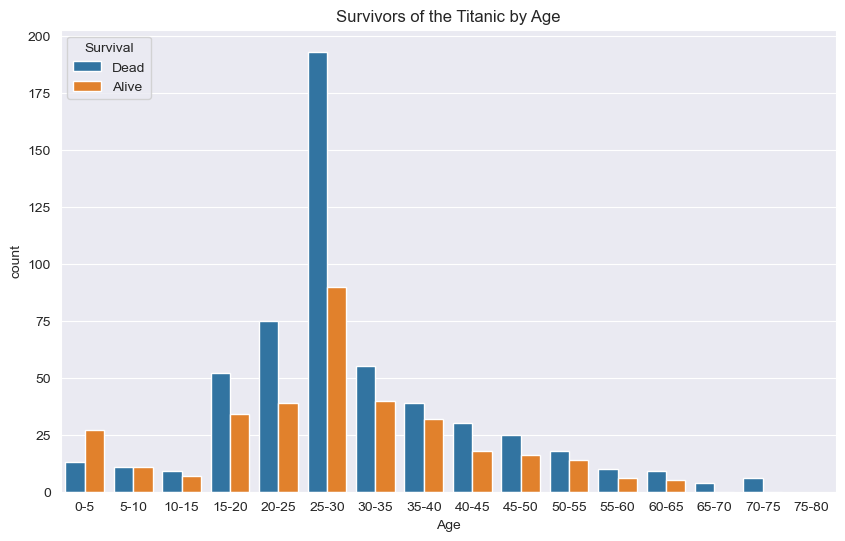

In [22]:
# Chart displaying the ages of passengers aboard the titanic

# Create bins to contain the ages of passengers
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80']
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create the plot
plt.figure(figsize=(10, 6))

# Create a bar chart
sns.countplot(x='age_bin', data=df, hue='alive');

# Customize the plot
plt.title('Survivors of the Titanic by Age')
plt.xlabel('Age')
plt.legend(title='Survival', labels=['Dead', 'Alive'])

# Display the plot
plt.show()

In [23]:
# Remove the age bin since it will no longer be needed for analysis
df = df.drop('age_bin', axis=1)

The chart titled "Survivors of the Titanic by Age" is a bar graph that shows the count of individuals by age group, categorized by survival status — with blue bars representing those who did not survive (labeled "Dead") and orange bars representing those who survived (labeled "Alive").

From the chart, we can observe that:

    Younger age groups, particularly children (ages 0-5 and 5-10), had a higher number of survivors compared to non-survivors, indicating a higher survival rate for children.
    The age group with the highest number of non-survivors seems to be adults in their 20s to 30s, which may correspond to the largest demographic on board.
    For most adult age groups, the number of non-survivors surpasses the number of survivors, which may reflect the overall tragic outcome for the majority of the passengers.
    There is a noticeable drop in the count of individuals in the oldest age groups (70-75 and 75-80), which might be due to a smaller number of passengers in those age brackets.

This chart suggests that age was a factor in survival, with children being more likely to survive, potentially due to the "women and children first" policy during lifeboat loading. The survival rates for other age groups would benefit from further analysis, potentially considering additional factors such as gender, passenger class, and family presence on board.

# Machine Learning Model

In [25]:
# Examine the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.3+ KB


In [26]:
# Look at the data frame
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True


In [27]:
# Drop the 'embark_town' and 'class' columns since the 'embarked' and 'pclass' columns contain abbreviated versions of the same
# information and will be less resource-intensive to encode
# Drop the 'alive' column as it is redundant since this dataset has the 'survived' column in binary already
df= df.drop(['embark_town', 'class', 'alive'], axis = 1)

In [28]:
# Map 'male' to 0 and 'female' to 1
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Convert 'adult_male' to binary
df['adult_male'] = df['adult_male'].astype(int)

# Convert 'alone' to binary
df['alone'] = df['alone'].astype(int)

In [29]:
# Create an X and Y for training
X = df.drop('survived', axis=1)

y = df['survived']

In [30]:
# Encode the 'pclass', 'embarked' and 'who' so that the dataset will be ready for machine learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a list of categorical features
cat_features = ['pclass', 'embarked', 'who']

# Encode data
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  cat_features)],
                                remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [39]:
# Split into training and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.15)

# Build Machine Learning Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Fit the data to the model
clf.fit(X_train, y_train);

In [40]:
clf.score(X_test, y_test)

0.8507462686567164

## Improve the model

In [41]:
# Use different number of estimators

np.random.seed(40)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:2f}%")
    print("")

Trying model with 10 estimators
Model accuracy on test set: 81.343284%

Trying model with 20 estimators
Model accuracy on test set: 83.582090%

Trying model with 30 estimators
Model accuracy on test set: 83.582090%

Trying model with 40 estimators
Model accuracy on test set: 85.820896%

Trying model with 50 estimators
Model accuracy on test set: 85.074627%

Trying model with 60 estimators
Model accuracy on test set: 85.820896%

Trying model with 70 estimators
Model accuracy on test set: 84.328358%

Trying model with 80 estimators
Model accuracy on test set: 84.328358%

Trying model with 90 estimators
Model accuracy on test set: 85.074627%



In [42]:
print("The highest performing model has been achieved with 90 estimators.")
clf = RandomForestClassifier(n_estimators=90).fit(X_train,y_train)
print(f"Model accuracy on test set: {(clf.score(X_test, y_test) * 100).round(2)}%")

The highest performing model has been achieved with 90 estimators.
Model accuracy on test set: 85.07%


### Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create a k-fold cross-validation iterator
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation
cv_scores = cross_val_score(clf, transformed_X, y, cv=kf)

# The cv_scores contains an array of k validation scores
cv_scores

array([0.80337079, 0.81460674, 0.78089888, 0.82022472, 0.80225989])

In [44]:
# Analyze the results
mean_score = cv_scores.mean()
std_deviation = cv_scores.std()

print(f'Mean cross-validation score: {mean_score:.2f}')
print(f'Standard deviation of cross-validation score: {std_deviation:.2f}')

Mean cross-validation score: 0.80
Standard deviation of cross-validation score: 0.01


The cross-validation process conducted on the Titanic dataset indicates a robust model performance. With a mean cross-validation score of 0.80, the model demonstrates a high level of accuracy in predicting outcomes across different subsets of the data. Moreover, the standard deviation of the cross-validation score is 0.01, which is quite low. This low variance suggests that the model's predictive performance is consistent across different folds; it does not fluctuate much with respect to the data it's trained and tested on. This consistency is a positive sign of the model's reliability and indicates good generalizability when applied to new data. The results of this cross-validation give us confidence that the model is not overfitted to the particular quirks of the dataset and should perform well when making predictions in a real-world setting or on unseen data.

## Features Analysis

In [15]:
# View data types of current data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    889 non-null    int64  
 1   pclass      889 non-null    int64  
 2   sex         889 non-null    int64  
 3   age         889 non-null    float64
 4   sibsp       889 non-null    int64  
 5   parch       889 non-null    int64  
 6   fare        889 non-null    float64
 7   embarked    889 non-null    object 
 8   who         889 non-null    object 
 9   adult_male  889 non-null    int32  
 10  alone       889 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 69.6+ KB


In [16]:
# Remove objects from data frame for a correlational analysis
df = df.drop(['embarked', 'who'], axis = 1)

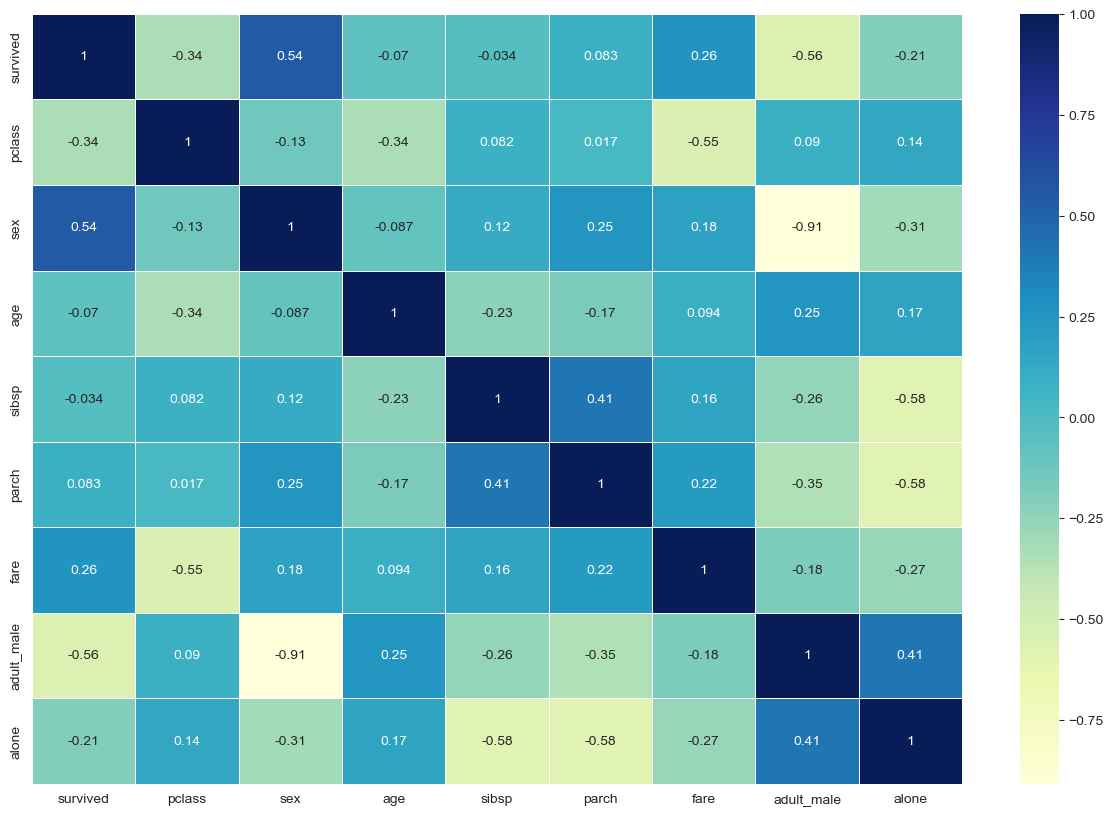

In [17]:
# Create a heatmap to examine correlations between features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, xticklabels = True, yticklabels=True, cmap="YlGnBu", linewidth=.5);

The above correlational heatmap visualizes the Pearson correlation coefficients between various features within the Titanic dataset. These coefficients range from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no linear correlation. Based upon this heatmap it can be concluded that:

    Survived vs. Sex: There is a positive correlation (approximately 0.54), suggesting that being female (sex coded as 1 for female and 0 for male) increased the likelihood of survival on the Titanic.

    Survived vs. Pclass: There is a negative correlation (approximately -0.34), indicating that passengers in higher classes (where 1st class is numerically lower) had a higher survival rate.

    Survived vs. Fare: A positive correlation of 0.26 shows that passengers who paid more for their tickets, likely those in higher classes, had better survival chances.

    Survived vs. Adult Male: There is a strong negative correlation (approximately -0.56), suggesting that adult males had a lower survival rate.

    Survived vs. Alone: There is a negative correlation (approximately -0.21), indicating that passengers who were alone had a slightly lower chance of survival compared to those with family or companions.

    Age vs. Pclass: A negative correlation (approximately -0.34) suggests that younger passengers tended to be in higher classes.

    Fare vs. Pclass: A strong negative correlation (approximately -0.55) confirms that higher classes (numerically lower) were associated with higher fares.

    Pclass vs. Adult Male: A positive correlation (approximately 0.09) is relatively weak but indicates that adult males were more common in lower classes.

    Alone vs. Pclass: A negative correlation (approximately -0.31) suggests that passengers in higher classes were less likely to be traveling alone.

These correlations help us understand the dynamics of survival on the Titanic. For instance, gender and class were major factors, with women and upper-class passengers more likely to survive. The negative correlation between 'Adult Male' and 'Survived' aligns with historical accounts that women and children were given priority for lifeboats. The correlations involving 'Fare' suggest that socio-economic status played a significant role in survival chances, with higher-paying passengers getting better access to life-saving resources.

# Conclusion

This exploration of the Titanic dataset has provided us with valuable insights into the factors that influenced survival during the tragic sinking of the ship. Through meticulous data cleaning, encoding categorical variables, and extensive exploratory data analysis, we identified key patterns and relationships within the data.

The survival patterns across different passenger classes revealed a stark disparity, with First Class passengers having a notably higher survival rate than those in Third Class. This observation suggests that socio-economic status played a crucial role in the likelihood of survival, a reflection of the social hierarchies of the time.

Further analysis on the embarkation points showed that passengers who boarded the Titanic at Cherbourg had a significantly higher survival rate compared to those who boarded at Southampton and Queenstown. A hypothesis test confirmed that this difference was statistically significant, indicating that the port of embarkation was more than just a trivial detail in the story of survival.

We also examined the survival rates based on whether passengers were traveling alone or with companions. As was expected, passengers who traveled with family and companions had a survival rate had a much higher survival rate, prompting a discussion on the influence of social bonds and responsibilities during times of crisis.

The age-based analysis painted a poignant picture of survival, with children having a higher likelihood of survival, likely due to prioritization during lifeboat evacuations. The grim reality for most adult passengers, especially those in their prime years, was highlighted by the higher mortality rates within these age groups.

The project's findings underscore the complex interplay of social norms, class, and human behavior in crisis situations. It also showcases the power of data analysis and machine learning in uncovering historical truths and patterns that can inform our understanding of past and present phenomena.

As we close this chapter of analysis, we reflect on the Titanic not just as a maritime disaster, but as a microcosm of early 20th-century society. The data tells a story of human nature, societal structures, and the randomness of survival, leaving us with lessons that resonate far beyond the cold waters of the North Atlantic.